In [ ]:
import numpy as np
import pandas as pd
import sklearn
sklearn.set_config(print_changed_only=True)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale,StandardScaler
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv("/content/Telecom_churn.csv")

In [198]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [199]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [200]:
df["Partner"].replace(["Yes","No"],[1,0],inplace=True)
df["Dependents"].replace(["Yes","No"],[1,0],inplace=True)
df["PhoneService"].replace(["Yes","No"],[1,0],inplace=True)
df["Churn"].replace(["Yes","No"],[1,0],inplace=True)
df["DeviceProtection"].replace(["Yes","No","No internet service"],[1,0,-1],inplace=True)
df["Contract"].replace(["Month-to-month","One year","Two year"],[0,1,2],inplace=True)
df["InternetService"].replace(["DSL","Fiber optic","No"],[2,1,0],inplace=True)
df["TechSupport"].replace(["Yes","No","No internet service"],[1,0,-1],inplace=True)
df["OnlineBackup"].replace(["No","Yes","No internet service"],[0,1,-1],inplace=True)
df["StreamingMovies"].replace(["No","Yes","No internet service"],[0,1,-1],inplace=True)
df["PaperlessBilling"].replace(["Yes","No"],[1,0],inplace=True)
df["gender"].replace(["Female","Male"],[0,1],inplace=True)
df["StreamingTV"].replace(["No","Yes","No internet service"],[0,1,-1],inplace=True)
df["MultipleLines"].replace(["Yes","No","No phone service"],[1,0,-1],inplace=True)
df["OnlineSecurity"].replace(["No","Yes","No internet service"],[0,1,-1],inplace=True)




In [201]:
df["TotalCharges"].replace([' '],[0],inplace=True)
df["TotalCharges"] = df["TotalCharges"].astype("float64")
data1 = df[df['TotalCharges'] != 0] 
m1 = data1['TotalCharges'].mean()
df['TotalCharges'].replace([0],[m1],inplace = True)


In [202]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,0.000863,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,0.000126,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.032310,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,-0.142554,0.156530,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,-0.000891,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,-0.014877,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.044590,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,0.243187,-0.111377,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.030359,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,-0.387436,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.002247,0.016505,0.247398,0.112851,0.011942
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,-0.186826,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,0.490700,0.412079,0.036310
InternetService,0.000863,0.032310,-0.000891,-0.044590,0.030359,-0.387436,-0.186826,1.000000,0.720587,0.650962,0.646159,0.716993,0.593193,0.597266,-0.099721,0.138625,0.323260,0.175429,0.047291
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,0.720587,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,0.635534,0.482445,0.023309
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.650962,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,-0.035407,0.260715,0.710477,0.536976,0.074205


In [203]:
x = df.drop(['customerID','PaymentMethod','Churn'],axis = 1)
y = df.Churn

In [204]:
feature_names = x.columns

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
scaler = MinMaxScaler()

In [207]:
scaler.fit(x)

MinMaxScaler()

In [208]:
x = scaler.transform(x)

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state = 0)

In [210]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(x_train,y_train)
import matplotlib.pyplot as plt


[Text(232.5, 251.66666666666666, 'Contract <= 0.25\ngini = 0.39\nsamples = 5282\nvalue = [3880, 1402]'),
 Text(116.25, 151.0, 'MonthlyCharges <= 0.504\ngini = 0.489\nsamples = 2930\nvalue = [1682, 1248]'),
 Text(58.125, 50.333333333333314, 'gini = 0.409\nsamples = 1265\nvalue = [902, 363]'),
 Text(174.375, 50.333333333333314, 'gini = 0.498\nsamples = 1665\nvalue = [780, 885]'),
 Text(348.75, 151.0, 'MonthlyCharges <= 0.75\ngini = 0.122\nsamples = 2352\nvalue = [2198, 154]'),
 Text(290.625, 50.333333333333314, 'gini = 0.078\nsamples = 1799\nvalue = [1726, 73]'),
 Text(406.875, 50.333333333333314, 'gini = 0.25\nsamples = 553\nvalue = [472, 81]')]

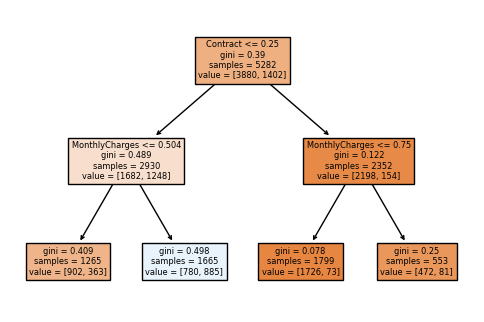

In [211]:
plt.figure(dpi=100)
plot_tree(tree,feature_names=feature_names, filled=True)

[Text(455.06796116504853, 252.3857142857143, 'Contract <= 0.25\ngini = 0.39\nsamples = 5282\nvalue = [3880, 1402]'),
 Text(237.69174757281553, 213.55714285714288, 'MonthlyCharges <= 0.504\ngini = 0.489\nsamples = 2930\nvalue = [1682, 1248]'),
 Text(119.86165048543688, 174.72857142857146, 'tenure <= 0.049\ngini = 0.409\nsamples = 1265\nvalue = [902, 363]'),
 Text(65.00970873786407, 135.9, 'InternetService <= 0.25\ngini = 0.492\nsamples = 453\nvalue = [255, 198]'),
 Text(32.50485436893204, 97.07142857142858, 'TotalCharges <= 0.0\ngini = 0.414\nsamples = 191\nvalue = [135, 56]'),
 Text(16.25242718446602, 58.24285714285716, 'SeniorCitizen <= 0.5\ngini = 0.475\nsamples = 124\nvalue = [76, 48]'),
 Text(8.12621359223301, 19.41428571428571, 'gini = 0.467\nsamples = 121\nvalue = [76, 45]'),
 Text(24.37864077669903, 19.41428571428571, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(48.75728155339806, 58.24285714285716, 'MonthlyCharges <= 0.016\ngini = 0.21\nsamples = 67\nvalue = [59, 8]'),
 Te

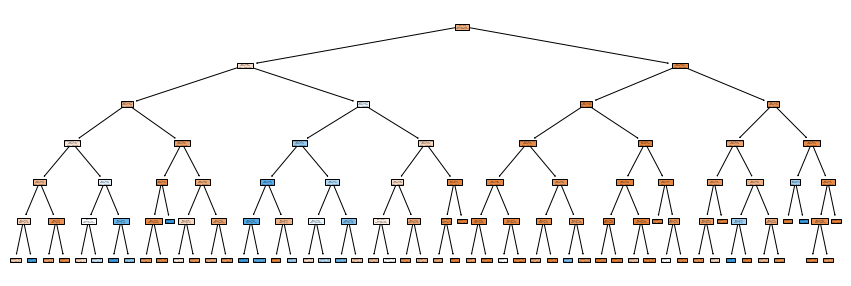

In [212]:
tree = DecisionTreeClassifier(max_depth=6).fit(x_train, y_train)
plt.figure(figsize=(15,5))
plot_tree(tree,feature_names=feature_names, filled=True)

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'max_depth':range(1,20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 0),param_grid=param_grid,cv = StratifiedShuffleSplit(100),return_train_score=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True)

In [214]:
grid.best_params_

{'max_depth': 4}

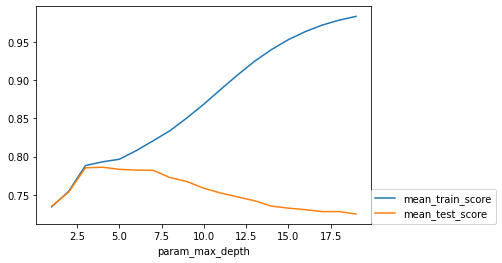

In [215]:
import pandas as pd
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y = ['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

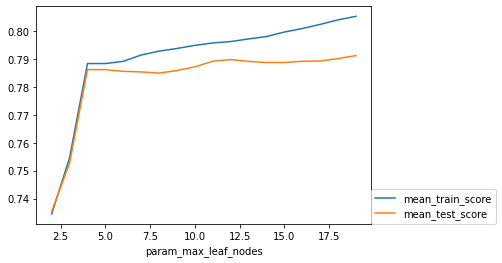

In [216]:
param_grid = {'max_leaf_nodes':range(2,20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 0),param_grid=param_grid,cv = StratifiedShuffleSplit(100,random_state=1),return_train_score=True)
grid.fit(x_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y = ['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

In [217]:
grid.best_params_

{'max_leaf_nodes': 19}

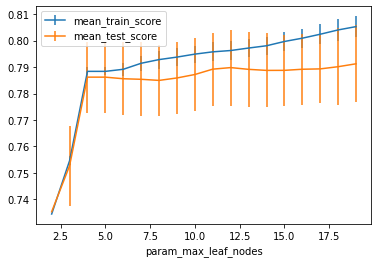

In [218]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y = 'mean_train_score',yerr='std_train_score',ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y = 'mean_test_score',yerr='std_test_score',ax=plt.gca())

[Text(224.19642857142858, 201.90857142857143, 'X[14] <= 0.25\ngini = 0.39\nsamples = 5282\nvalue = [3880, 1402]'),
 Text(149.46428571428572, 170.84571428571428, 'X[16] <= 0.504\ngini = 0.489\nsamples = 2930\nvalue = [1682, 1248]'),
 Text(77.72142857142858, 139.78285714285715, 'X[4] <= 0.049\ngini = 0.409\nsamples = 1265\nvalue = [902, 363]'),
 Text(47.82857142857143, 108.72, 'X[12] <= 0.25\ngini = 0.492\nsamples = 453\nvalue = [255, 198]'),
 Text(23.914285714285715, 77.65714285714284, 'X[17] <= 0.0\ngini = 0.414\nsamples = 191\nvalue = [135, 56]'),
 Text(11.957142857142857, 46.59428571428572, 'gini = 0.475\nsamples = 124\nvalue = [76, 48]'),
 Text(35.871428571428574, 46.59428571428572, 'gini = 0.21\nsamples = 67\nvalue = [59, 8]'),
 Text(71.74285714285715, 77.65714285714284, 'X[1] <= 0.5\ngini = 0.496\nsamples = 262\nvalue = [120, 142]'),
 Text(59.785714285714285, 46.59428571428572, 'gini = 0.5\nsamples = 231\nvalue = [114, 117]'),
 Text(83.7, 46.59428571428572, 'gini = 0.312\nsamples 

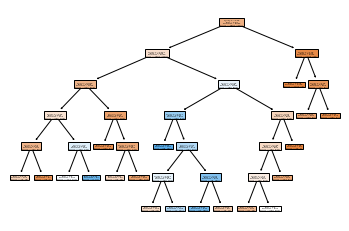

In [219]:
plot_tree(grid.best_estimator_,filled=True)

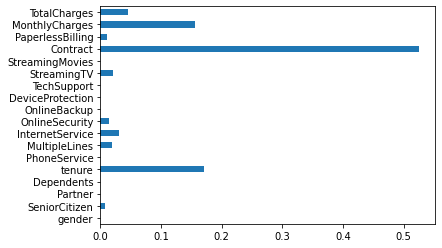

In [220]:
pd.Series(grid.best_estimator_.feature_importances_,index=feature_names).plot(kind='barh')

[Text(418.5, 244.62, 'Contract <= 0.25\ngini = 0.39\nsamples = 5282\nvalue = [3880, 1402]'),
 Text(209.25, 190.26000000000002, 'MonthlyCharges <= 0.504\ngini = 0.489\nsamples = 2930\nvalue = [1682, 1248]'),
 Text(104.625, 135.9, 'tenure <= 0.049\ngini = 0.409\nsamples = 1265\nvalue = [902, 363]'),
 Text(52.3125, 81.54000000000002, 'StreamingTV <= 0.25\ngini = 0.492\nsamples = 453\nvalue = [255, 198]'),
 Text(26.15625, 27.180000000000007, 'gini = 0.414\nsamples = 191\nvalue = [135, 56]'),
 Text(78.46875, 27.180000000000007, 'gini = 0.496\nsamples = 262\nvalue = [120, 142]'),
 Text(156.9375, 81.54000000000002, 'InternetService <= 0.75\ngini = 0.324\nsamples = 812\nvalue = [647, 165]'),
 Text(130.78125, 27.180000000000007, 'gini = 0.171\nsamples = 223\nvalue = [202, 21]'),
 Text(183.09375, 27.180000000000007, 'gini = 0.369\nsamples = 589\nvalue = [445, 144]'),
 Text(313.875, 135.9, 'tenure <= 0.215\ngini = 0.498\nsamples = 1665\nvalue = [780, 885]'),
 Text(261.5625, 81.54000000000002, 'To

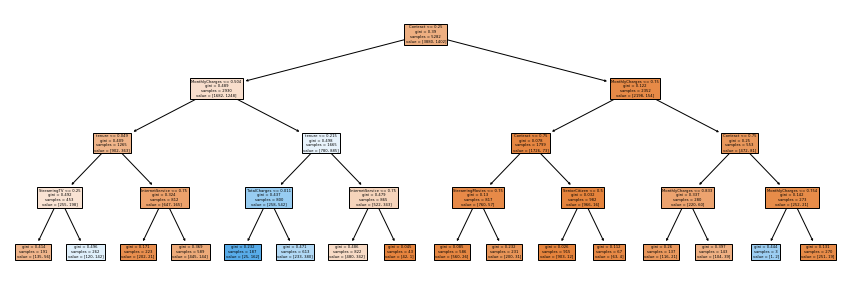

In [221]:
tree = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=19)
tree.fit(x_train, y_train)
plt.figure(figsize=(15,5))
plot_tree(tree,feature_names=feature_names, filled=True)


In [222]:
y_pred = tree.predict(x_test)

In [223]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)

array([[1160,  134],
       [ 232,  235]])

In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1294
           1       0.64      0.50      0.56       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [225]:
tree.score(x_test,y_test)

0.7921635434412265